In [12]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# read csv file and convert into dataframe
df= pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Observations about dataset
Firstly, we explore the avocado dataset

- Unnamed:0 : no need of this column , it has only index numbers
- Date : The datatype of date is object type , we need to handle the column
- AveragePrice : the average price of a single avocado
- type : it has two values conventional or organic,we need to handle the data using encoding techniques to convert into           numbers.
- Region: the datatype of the region is object type,we need to handle the data using encoding techniques to convert into         numbers.
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold
- Total Bags: Total number of Bags sold
- Small Bags: Total number of Small Bags sold
- Large Bags: Total number of Large Bags sold
- XLarge Bags: Total number of XLarge Bags sold
 

In [14]:
# let's drop the unnecessary columns from the dataset
df.drop('Unnamed: 0',axis =1,inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### Date,type and region columns are having object datatype,we need to convert into numbers

In [16]:
# let's check the shape of data
df.shape

(18249, 13)

### We have 18249 rows and 13 columns

In [17]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### There is no null values present in this dataset

In [18]:
#let's convert the date column
df['Date']=pd.to_datetime(df['Date'])
df['Day']= df['Date'].apply(lambda dt:dt.day)
df['Month']= df['Date'].apply(lambda dt:dt.month)
df['Year']=df['Date'].apply(lambda dt:dt.year)

In [19]:
#let's drop the Date and year column from dataset
df.drop(columns = ['Date','year'],axis = 1,inplace = True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015


In [20]:
# lets encode the region column using ordinal encoder
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [35]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [36]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [37]:
# let's replace the type column values into numbers
df['type']=df['type'].replace({'conventional':0,'organic':1})
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany,29,11,2015


## Checking Duplicate values


In [38]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, region, Day, Month, Year]
Index: []


### There is no duplicates present in this dataset


In [39]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Day,Month,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,15.466984,6.372842,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,8.984552,3.525034,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,7.000000,3.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,16.000000,6.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,23.000000,10.000000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,31.000000,12.000000,2018.000000


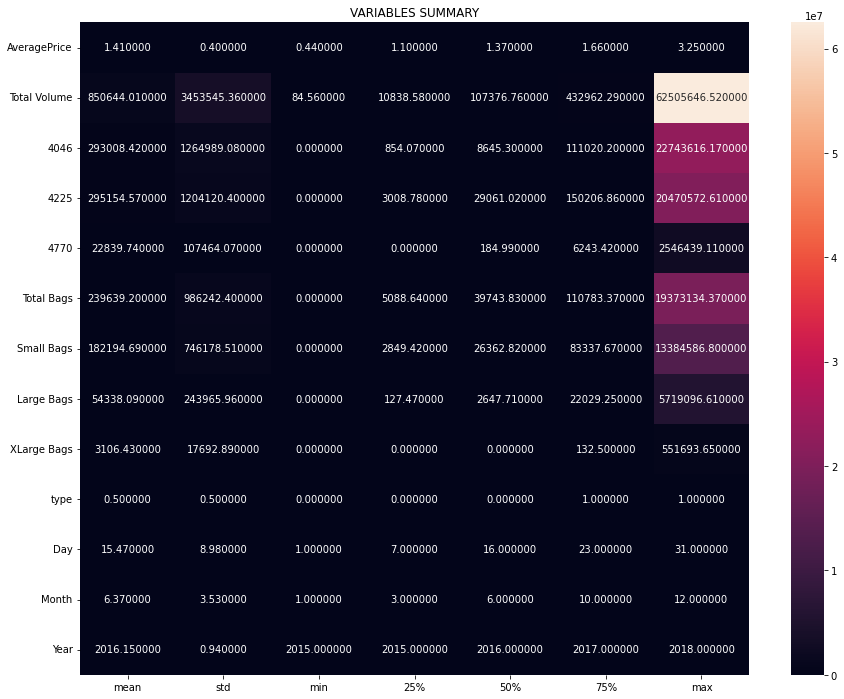

In [40]:
df.describe()
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f')
plt.xticks
plt.yticks
plt.title("VARIABLES SUMMARY")
plt.show()

## Observations:-
- Date,Month,Years are newly tranformed columns overall health is satisfactory
- XLarge Bags is indicating the presence of outliers and skewness.
- Large Bags are also indicating the presence of Skewness and outliers.
- Small Bags,TotalBags,4770,4225,4046 and total Volume all features are indicating presence of outliers and skewness.

# EDA

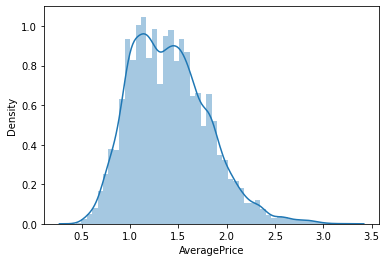

In [114]:
# let's visualize the averageprice
sns.distplot(df['AveragePrice'])
plt.show()

### Average Price distribution shows that for most of the cases price of avocado is between 1.0 to 1.7


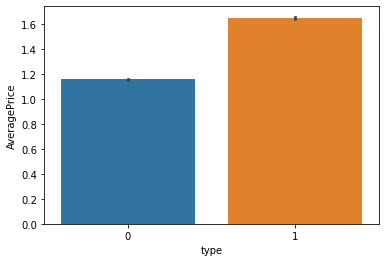

In [115]:
#Let's look at average price of conventional vs. organic.
sns.barplot(x='type',y = 'AveragePrice',data=df)
plt.show()

### organic avocado prices are more than conventional

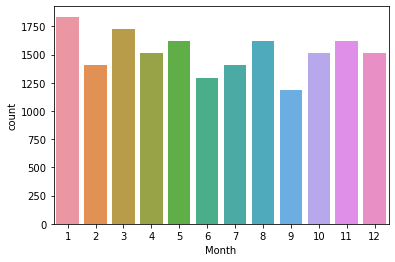

In [116]:
# lets visualize the months data
sns.countplot(x='Month',data=df)
plt.show()


In [117]:
print(df['Month'].value_counts())

1     1836
3     1728
11    1620
8     1620
5     1620
12    1512
10    1512
4     1512
2     1404
7     1404
6     1293
9     1188
Name: Month, dtype: int64


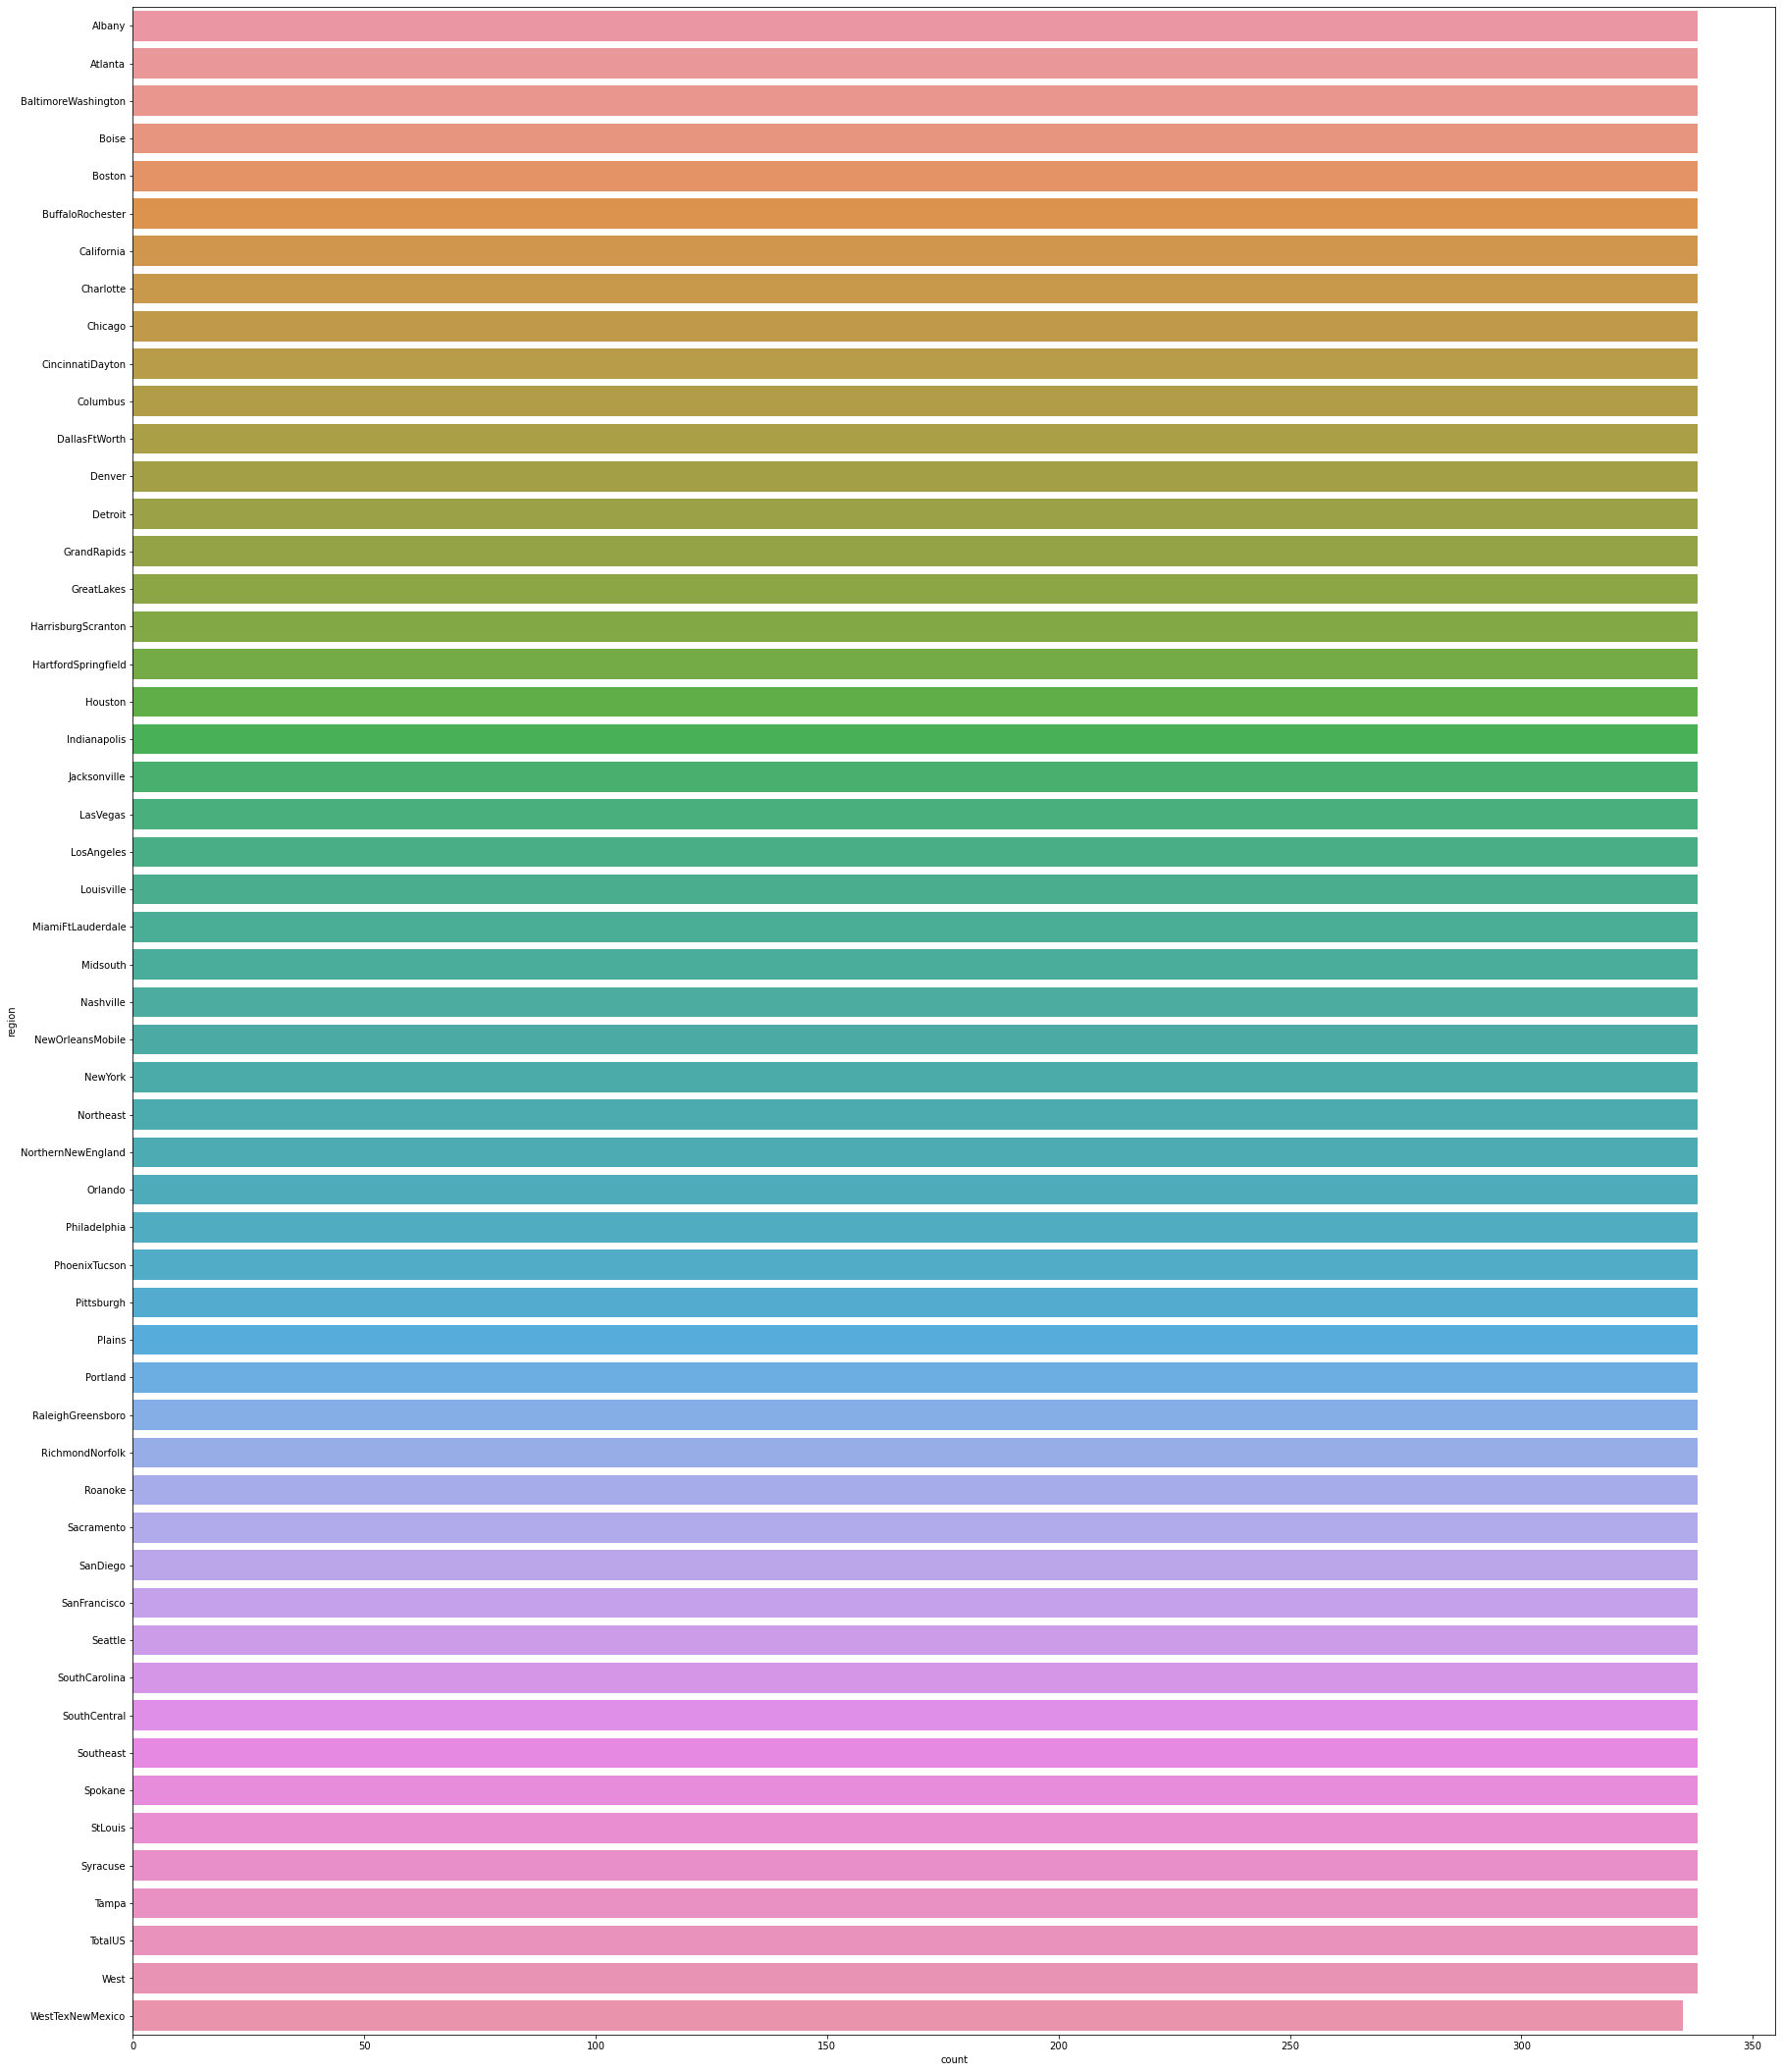

In [27]:
# let's visualize the regions
plt.figure(figsize=(30,38))
sns.countplot(y='region',data=df)
plt.show()

In [28]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

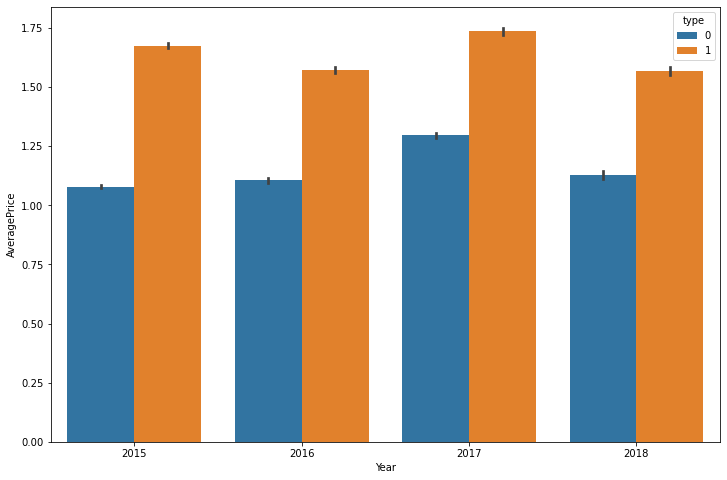

In [120]:
# let's visualize the relationship between avg price and year basis of type using barplot
plt.figure(figsize=(12,8))
sns.barplot(x = 'Year',y= 'AveragePrice',hue = 'type',data = df)
plt.show()

In [121]:
df.groupby('Year')['type'].value_counts()

Year  type
2015  0       2808
      1       2807
2016  0       2808
      1       2808
2017  0       2862
      1       2860
2018  0        648
      1        648
Name: type, dtype: int64

### in 2017, both conventional and organic avg prices are more than others

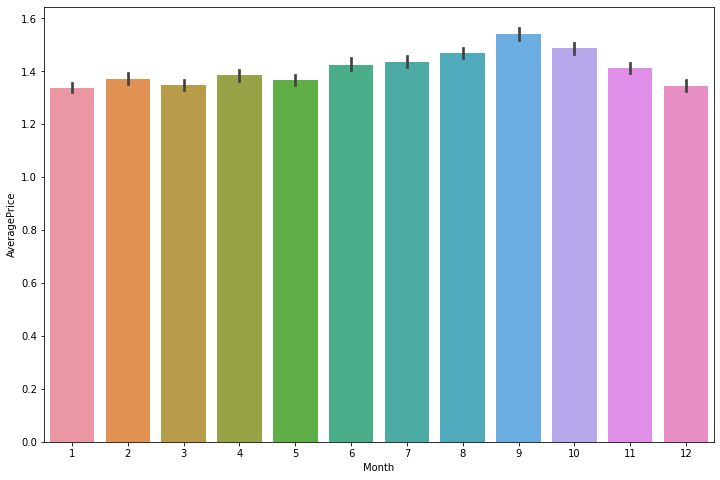

In [122]:
# ley's visualize the relationship between month and year using barplot
plt.figure(figsize=(12,8))
sns.barplot(x = 'Month',y= 'AveragePrice',data = df)
plt.show()

### Avg. prices are more in september and october as compared to other months

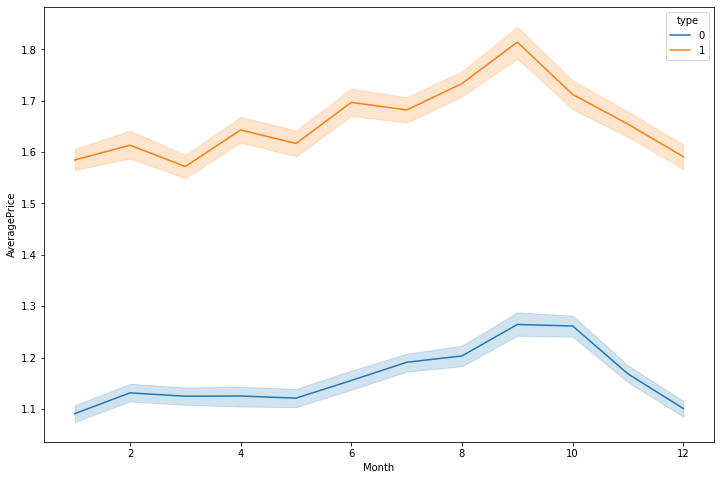

In [123]:
plt.figure(figsize=(12,8))
sns.lineplot(x = 'Month',y= 'AveragePrice',hue='type',data = df)
plt.show()

### both conventional and organic avg prices are increase in september and october

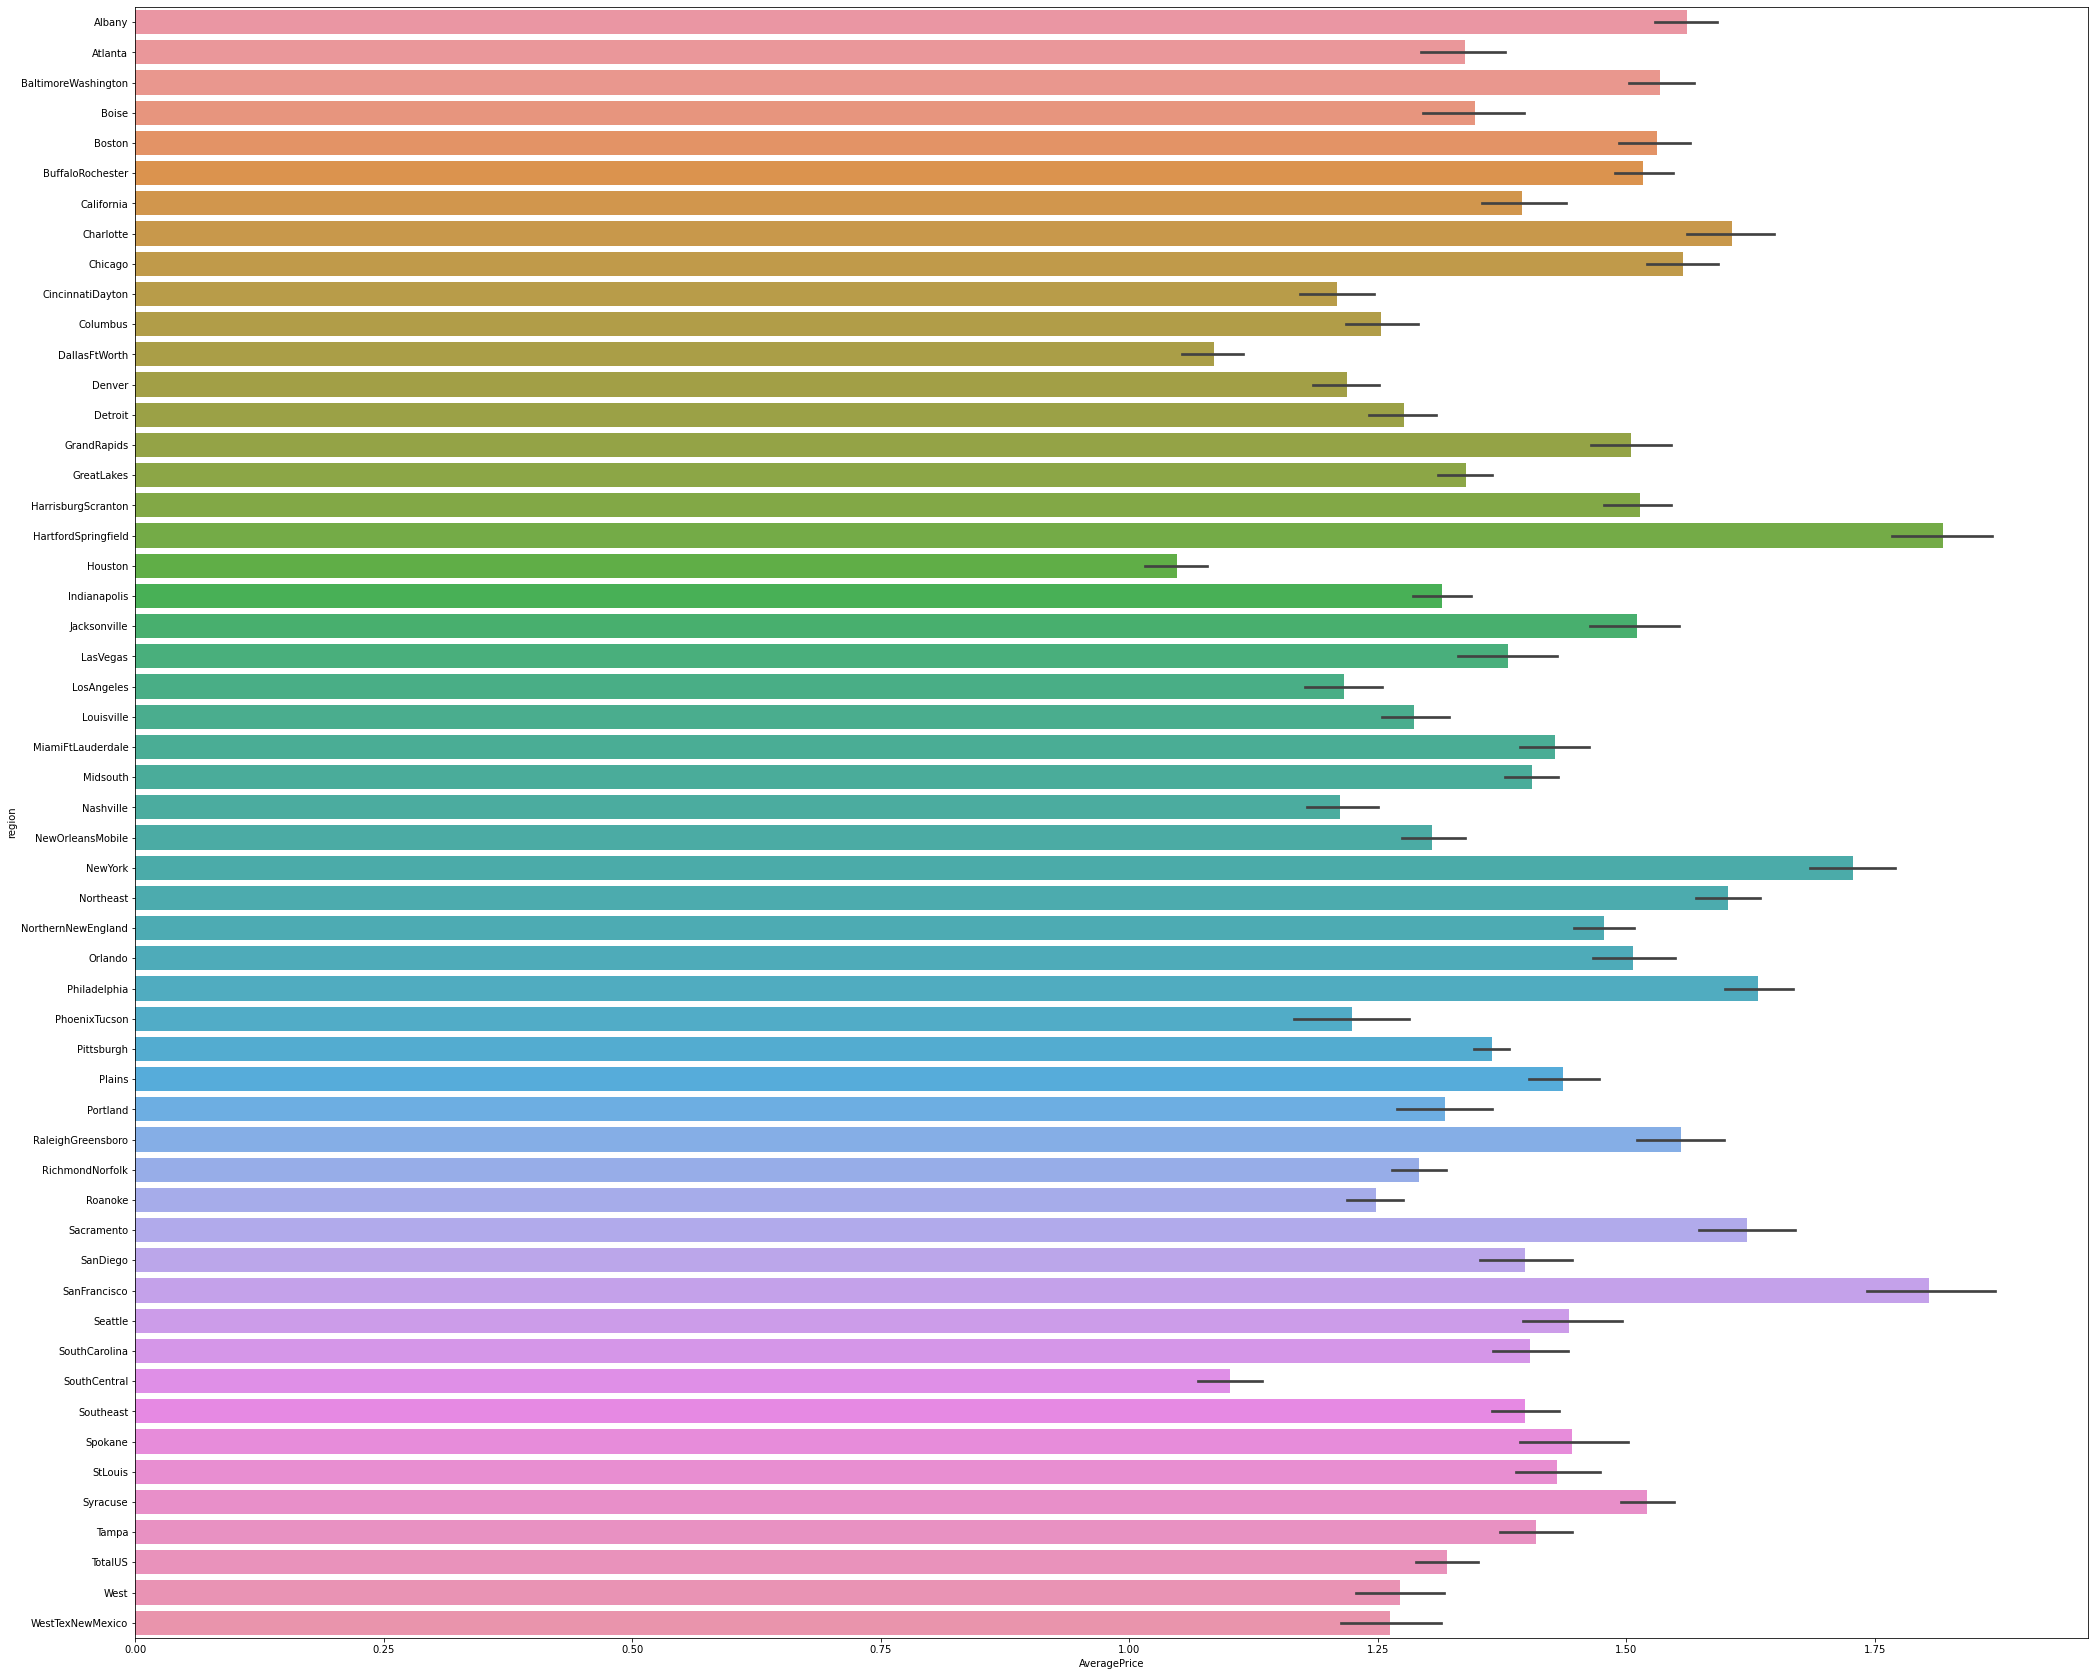

In [30]:
# let's visualize the relationship between region and average prices
plt.figure(figsize=(35,30))
sns.barplot(y = 'region',x= 'AveragePrice',data = df)
plt.show()

### Looks like these region are where price is very high
- HartfordSpringfield
- SanFrancisco
- NewYork
- Philadelphia
- Sacramento



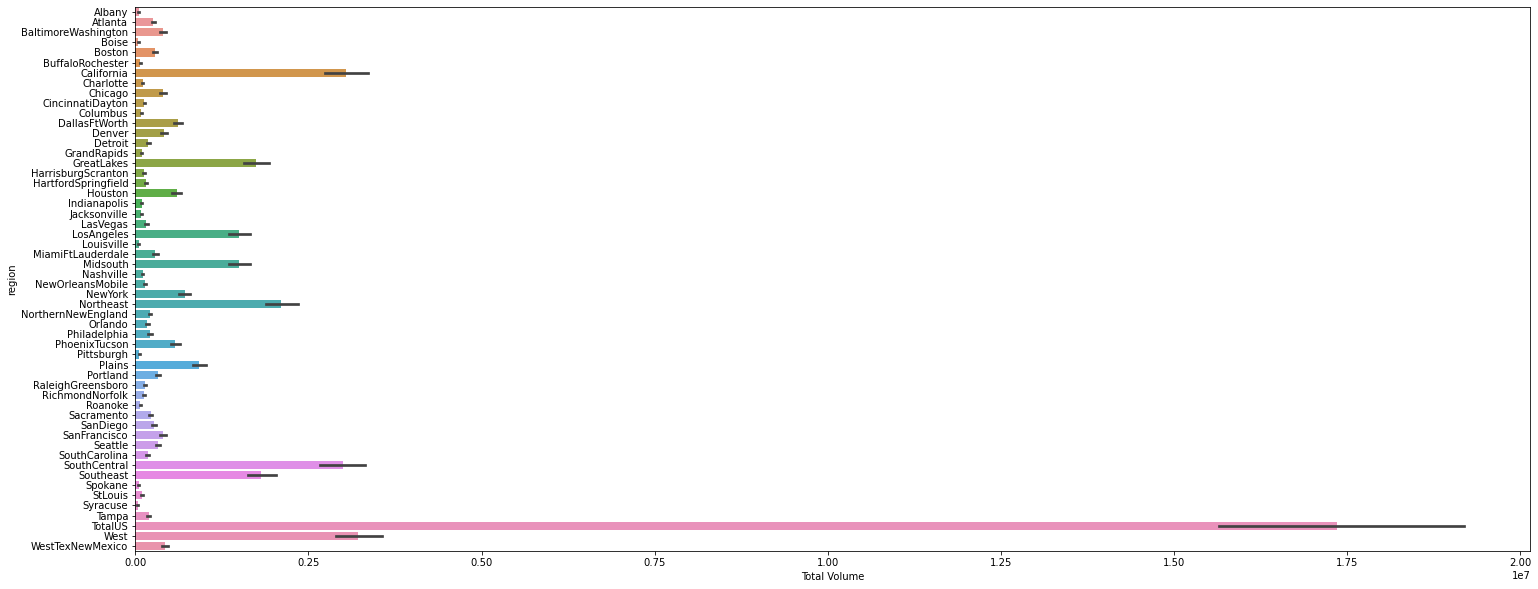

In [32]:
# let's visualize the relationship between region and totalvolume
plt.figure(figsize=(25,10))
sns.barplot(y = 'region',x= 'Total Volume',data = df)
plt.show()

### Looks like these region are where Consumption is very high
- West
- California
- SouthCentral
- Northeast
- Southeast



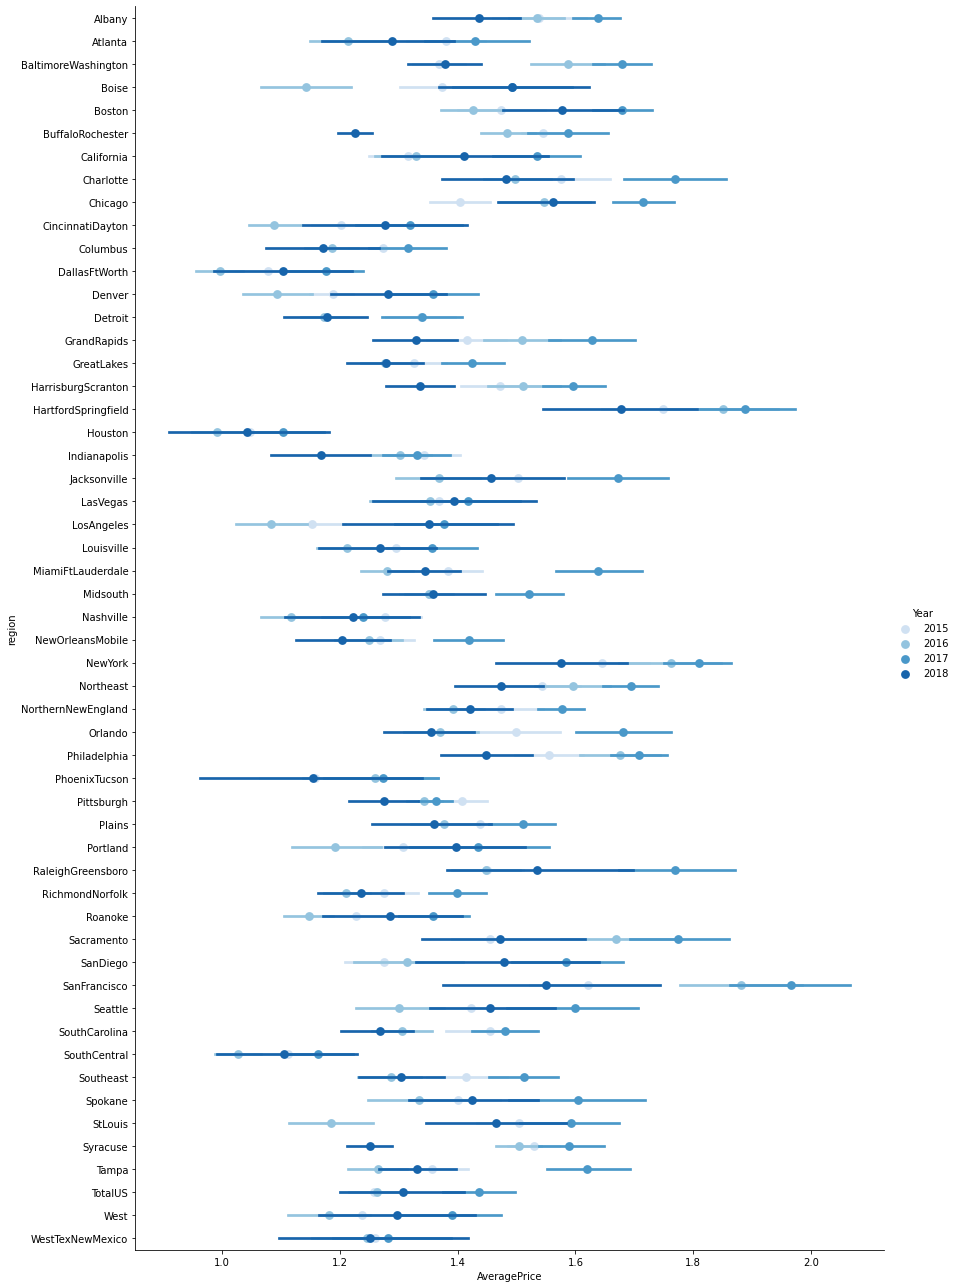

In [34]:
sns.factorplot('AveragePrice','region',data=df,hue='Year',size=18, aspect=0.7, palette='Blues', join=False)
plt.show()

### Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.


In [41]:
df['region']=ord_enc.fit_transform(df['region'].values.reshape(-1,1))
df['region']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 18249, dtype: float64

## Normal Distribution curve for every individual column


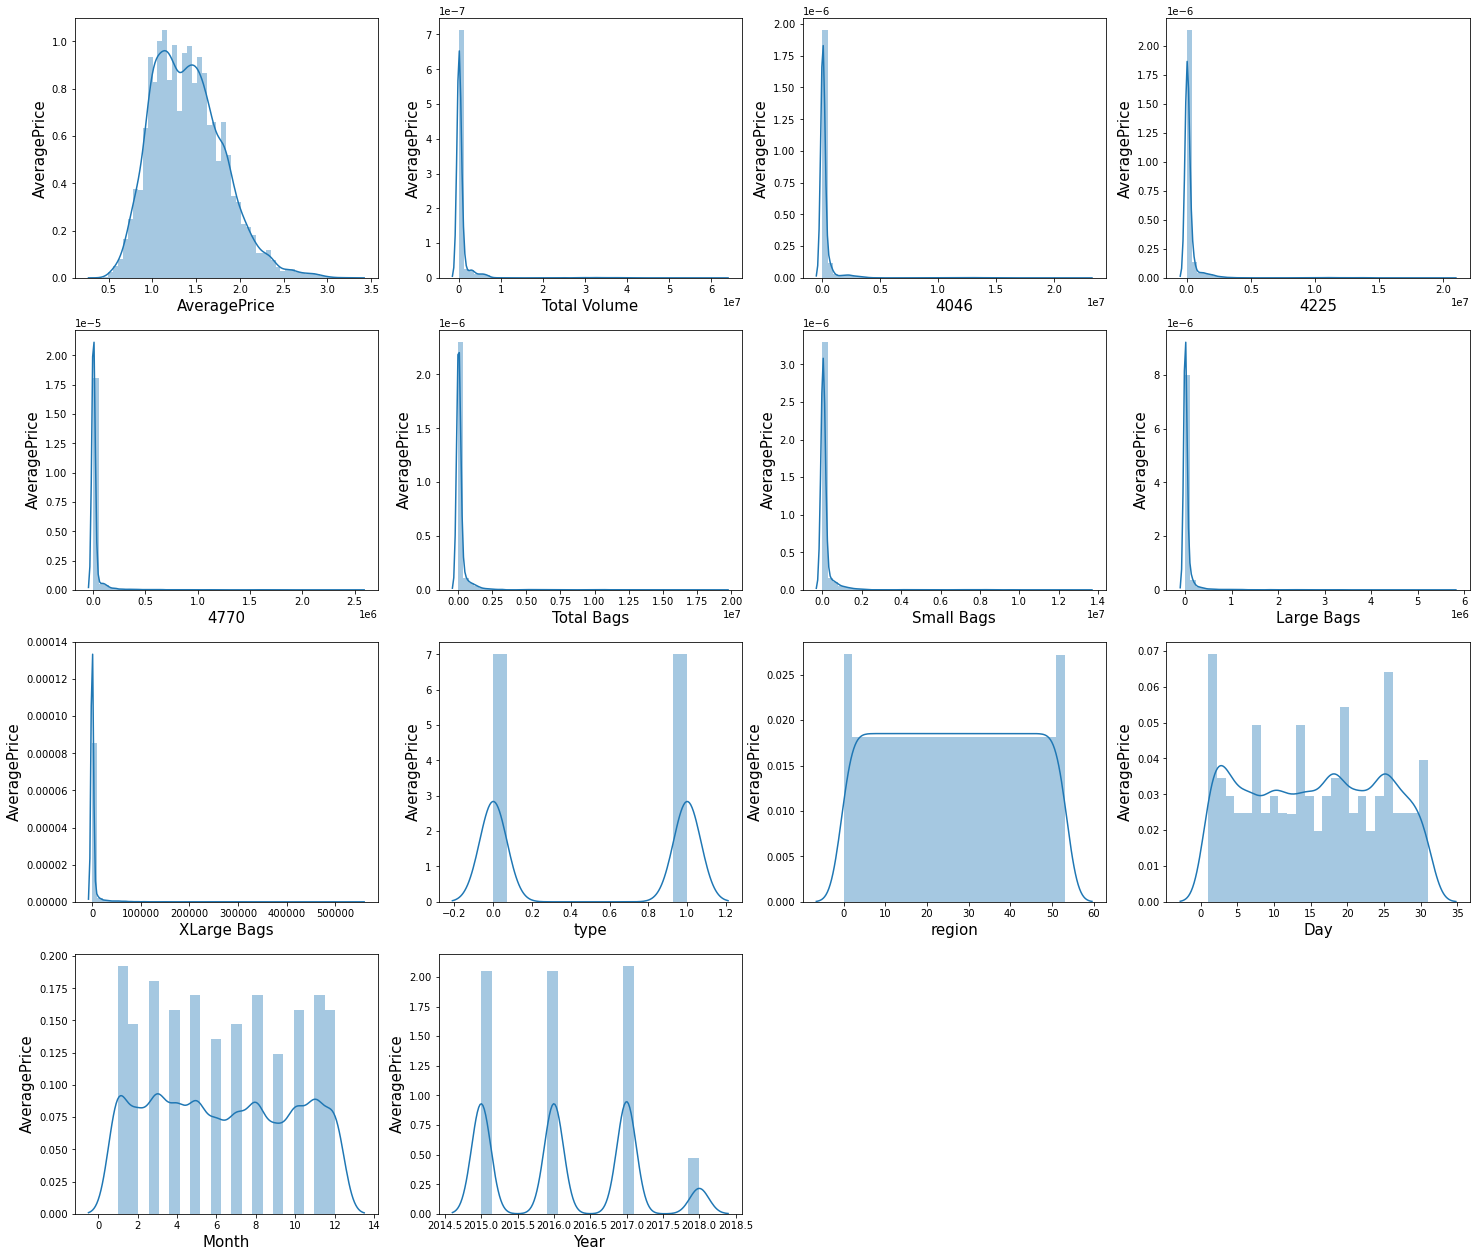

In [127]:
# let's visualize the data using distribution plot
plt.figure(figsize=(25,22))
pn = 1
for col in df:
    if pn <= 14:
        ax = plt.subplot(4,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('AveragePrice',fontsize = 15)
    pn +=1
plt.show()    

### TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,Xlargebags features are left skewed and showing outliers ,and other features are normally distributed

## Checking Outliers

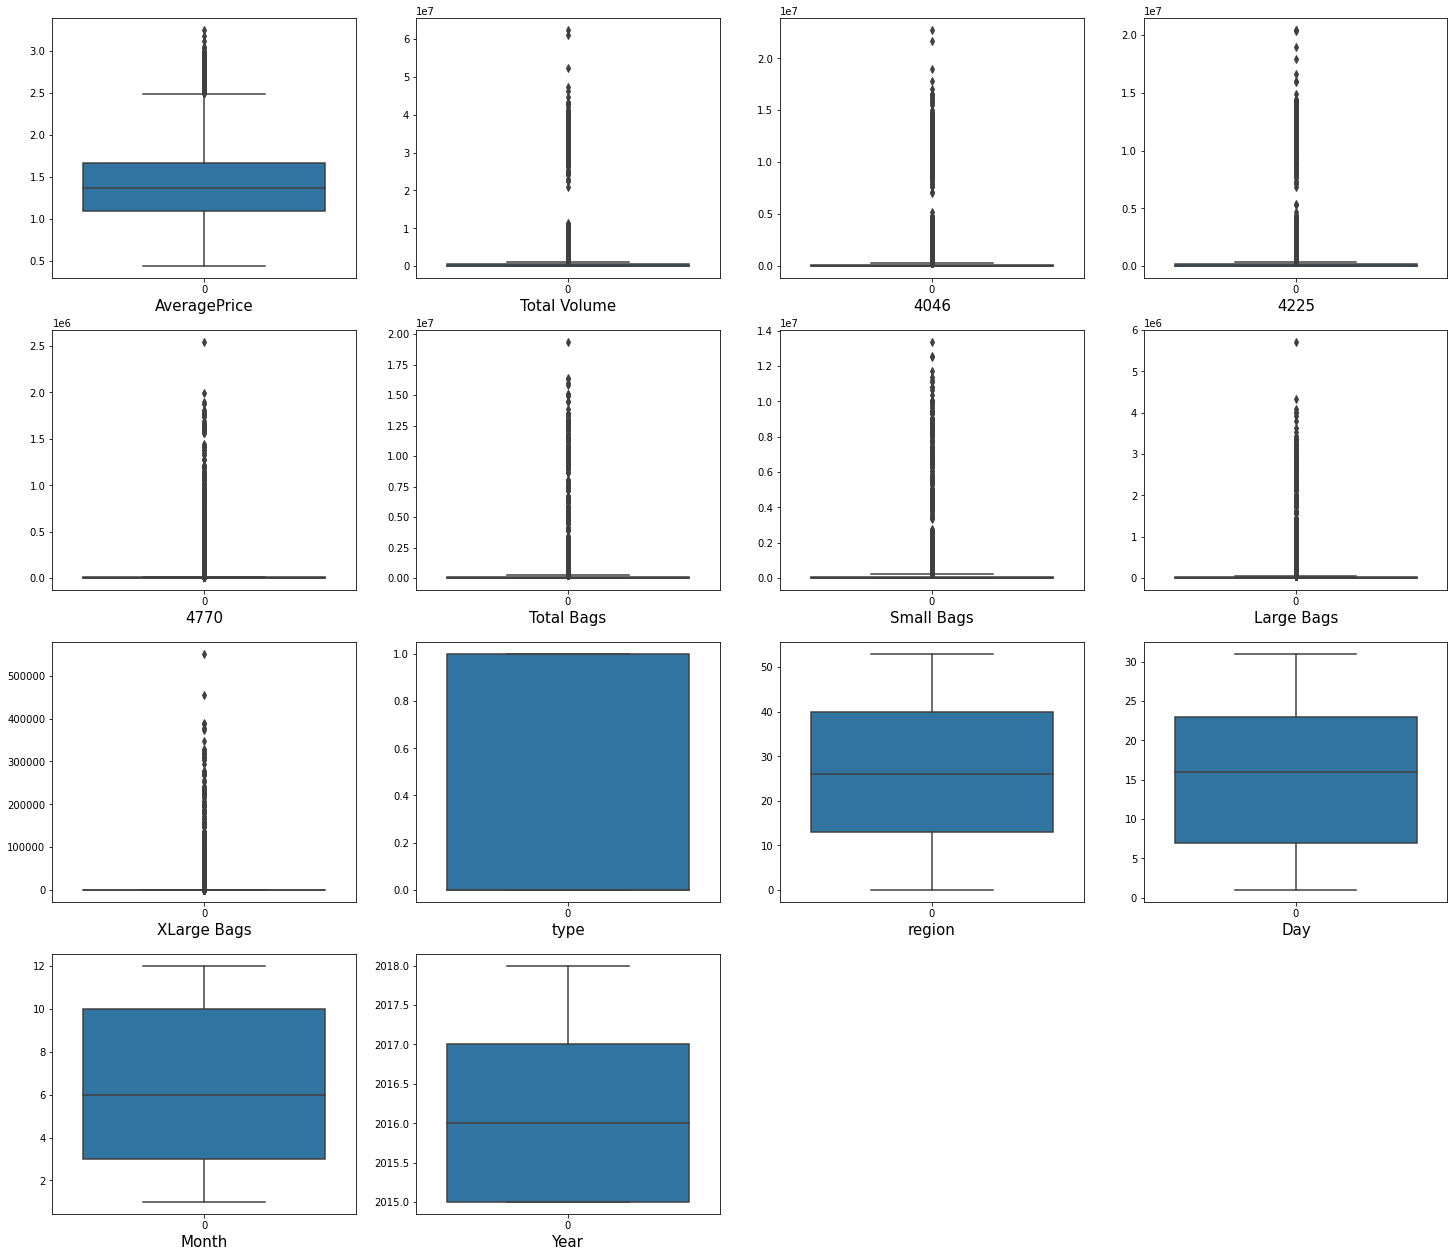

In [128]:
# let's check the outliers using box plot
plt.figure(figsize=(25,22))
pn = 1
for col in df:
    if pn <= 14:
        ax = plt.subplot(4,4,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

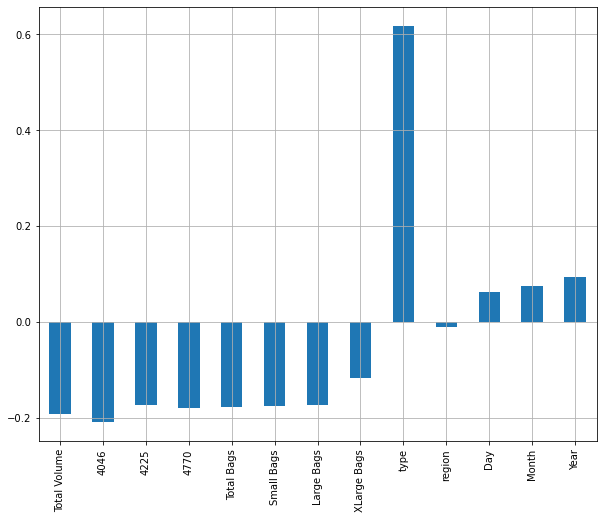

In [129]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice).plot(kind='bar',grid=True,figsize=(10,8))
plt.show()

## Removing Outliers


In [130]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (18249, 14)
Shape of the dataframe after removing outliers:  (17651, 14)
Percentage of data loss post outlier removal:  3.276891884486821


## Correlation

In [131]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.057723,0.069613,0.091704
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.008351,-0.012375,-0.004866
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.010074,-0.008588,-0.034636
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.010957,-0.015669,-0.040234
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,-0.002559,-0.018524,-0.082054
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,0.001529,-0.006611,0.103442
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,0.002884,-0.007575,0.086639
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,-0.003935,-0.001837,0.119543
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.010817,0.001484,0.108209
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.018409,-0.004069,-0.004851,0.003867


In [132]:
# let's check the correation with AveragePrice
df.corr()['AveragePrice'].sort_values

<bound method Series.sort_values of AveragePrice    1.000000
Total Volume   -0.332056
4046           -0.333577
4225           -0.243988
4770           -0.243465
Total Bags     -0.297323
Small Bags     -0.275771
Large Bags     -0.270915
XLarge Bags    -0.152669
type            0.613150
region         -0.003242
Day             0.057723
Month           0.069613
Year            0.091704
Name: AveragePrice, dtype: float64>

<AxesSubplot:>

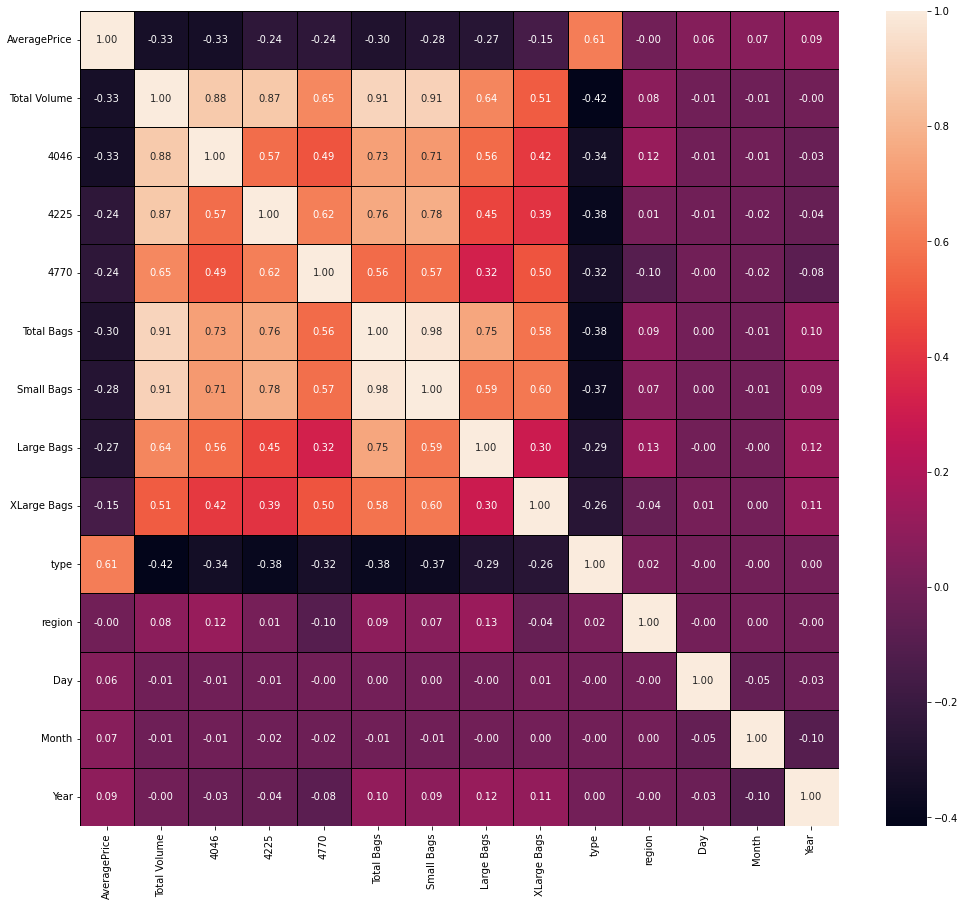

In [133]:
# let's check correlation using heatmap
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')

## Observation:-
- Total Volume is highly correlated with 4046(p=98%),4225(p=97%)
- Total Bags is highly correlated with small bags,LargeBags,XLargeBags
- 4046,4225,4770,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags are negatively correlated with Averageprice.
- type,region,day,month,year are positively correlated with AveragePrice.
- AveragePrice highly correlated with type.

In [134]:
# let's drop the unnecessary columns
df.drop(columns=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
df.shape

(17651, 8)

In [135]:
df.head()

,AveragePrice,Total Volume,Total Bags,type,region,Day,Month,Year
0,1.33,64236.62,8696.87,0,0.0,27,12,2015
1,1.35,54876.98,9505.56,0,0.0,20,12,2015
2,0.93,118220.22,8145.35,0,0.0,13,12,2015
3,1.08,78992.15,5811.16,0,0.0,12,6,2015
4,1.28,51039.60,6183.95,0,0.0,29,11,2015


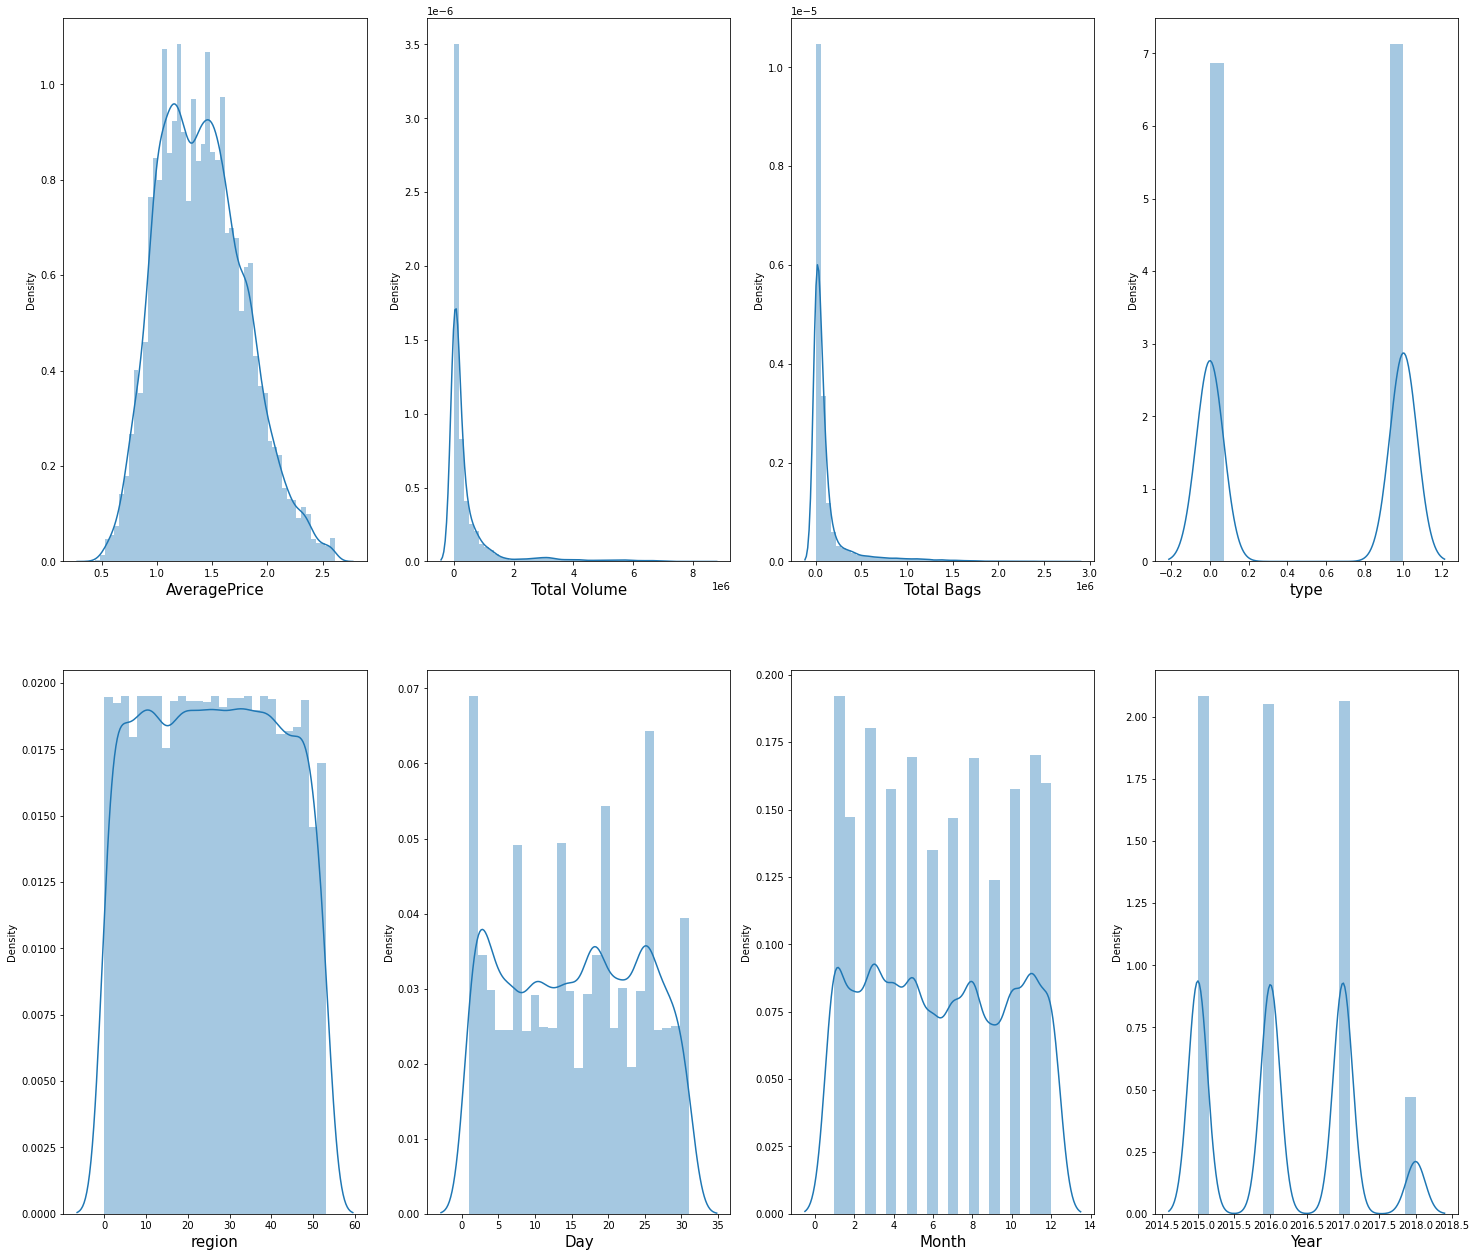

In [136]:
 #let's visualize the data after removing outliers and unnecessary columns
plt.figure(figsize = (25,22))
pn = 1
for col in df:
    if pn <= 8:
        plt.subplot(2,4,pn)
        ax=sns.distplot(df[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

### data is distributted normally but some features have skewness

## skewness

In [137]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
Total Bags      4.066771
type           -0.037741
region          0.012798
Day            -0.005030
Month           0.046419
Year            0.229976
dtype: float64

### Dividing data in features and label


In [138]:
x = df.drop('AveragePrice',axis = 1)
x.head()

,Total Volume,Total Bags,type,region,Day,Month,Year
0,64236.62,8696.87,0,0.0,27,12,2015
1,54876.98,9505.56,0,0.0,20,12,2015
2,118220.22,8145.35,0,0.0,13,12,2015
3,78992.15,5811.16,0,0.0,12,6,2015
4,51039.60,6183.95,0,0.0,29,11,2015


In [139]:
y = df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

### Transforming data to removing skewness

In [140]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head()

,Total Volume,Total Bags,type,region,Day,Month,Year
0,-0.075324,-0.537507,-1.019047,-2.01059,1.214623,1.475625,-1.210647
1,-0.147497,-0.498128,-1.019047,-2.01059,0.550794,1.475625,-1.210647
2,0.205556,-0.566369,-1.019047,-2.01059,-0.180898,1.475625,-1.210647
3,0.019655,-0.713068,-1.019047,-2.01059,-0.293199,-0.017894,-1.210647
4,-0.180674,-0.686312,-1.019047,-2.01059,1.395156,1.246164,-1.210647


In [141]:
pd.DataFrame(x).skew().sort_values()

region         -0.257799
Day            -0.230935
Month          -0.161423
type           -0.037741
Total Bags     -0.022204
Total Volume   -0.008642
Year            0.227731
dtype: float64

### Every value will be reduced after transformation

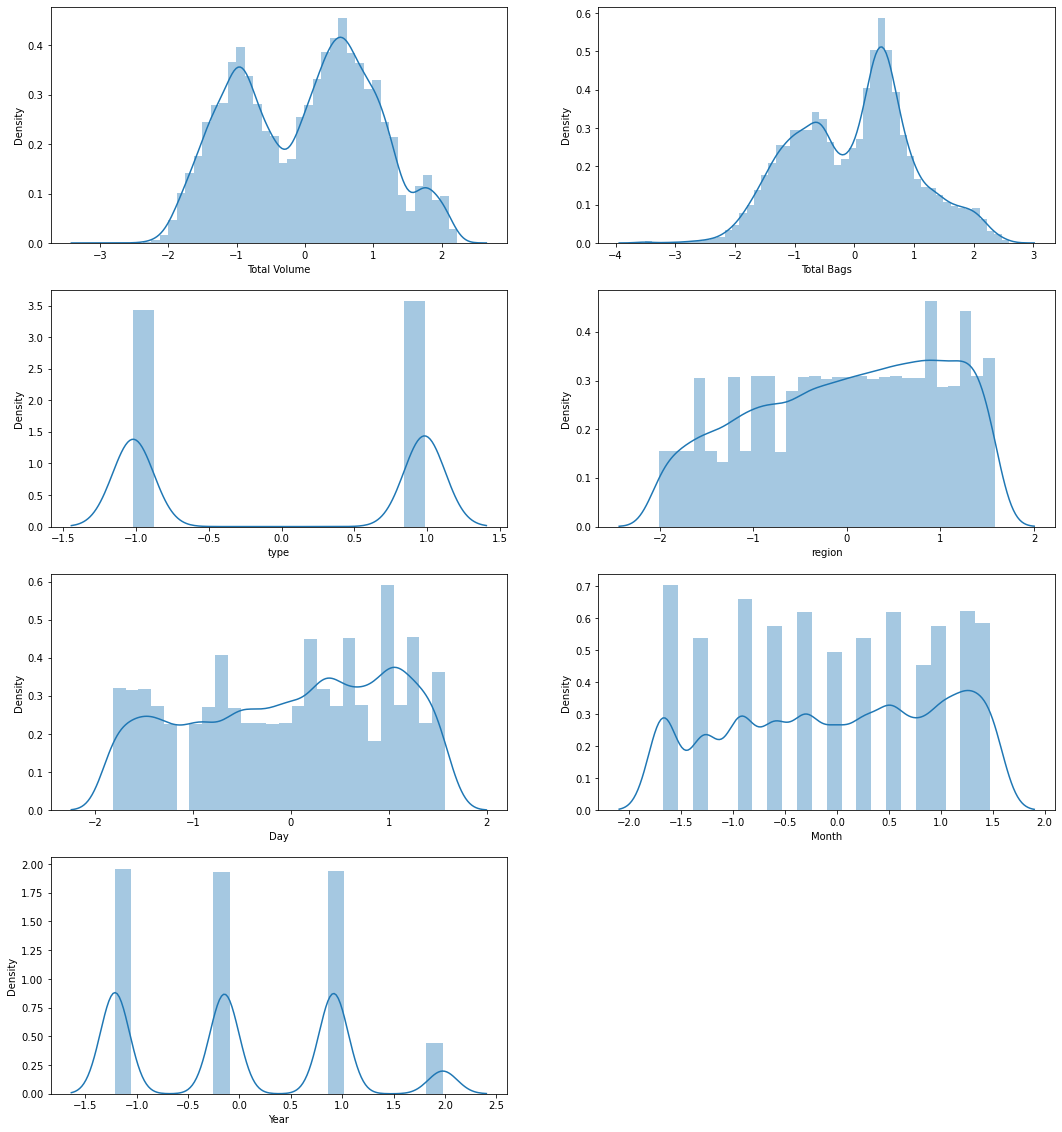

In [142]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally

# Model selection/predictions



## Regression because our Target variable 'AveragePrice' is continuous.

## Best Random State

In [46]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,400):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.20,random_state = i) 
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_train)
    score1 = r2_score(y_train,y_pred)
    pred = rf.predict(x_test)
    score=r2_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('testing score',score,'random state',i)
    

training score 0.9780546353150498 testing score 0.8280133401564657 random state 1
testing score 0.8280133401564657 random state 1
training score 0.9777985733363131 testing score 0.8288951913127047 random state 2
testing score 0.8288951913127047 random state 2
training score 0.977674979922127 testing score 0.8477935711618377 random state 3
testing score 0.8477935711618377 random state 3
training score 0.9775676105479884 testing score 0.8387949675278741 random state 4
testing score 0.8387949675278741 random state 4
training score 0.9769947726505256 testing score 0.855322091702285 random state 5
testing score 0.855322091702285 random state 5
training score 0.9778859747936952 testing score 0.8449276653800355 random state 6
testing score 0.8449276653800355 random state 6
training score 0.9775151363992447 testing score 0.8379107365445796 random state 7
testing score 0.8379107365445796 random state 7
training score 0.9774164817065463 testing score 0.8409986875831756 random state 8
testing sco

In [47]:
# create empty lists
training_score=[]
testing_score=[]
cross_val_score = []

In [62]:
cross_val_score

[44.569664722306825, 43.87760848991648]

## Train Test Split

In [49]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 335)


##  Model building using Linear Regression


In [50]:
# creating object for LinearRegression model
lr = LinearRegression()
lr.fit(x_train,y_train)
# let's check how well model fit on train data
lr.score(x_train,y_train)
# let's check how well model fits on test data
lr.score(x_test,y_test)
# predict the training score
x_pred=lr.predict(x_train)
training_score_lr=r2_score(y_train,x_pred)*100 
training_score.append(training_score_lr)
print("Traing score of Linear Regression",training_score_lr)
# predict the model
y_pred = lr.predict(x_test)
testing_score_lr = r2_score(y_test,y_pred)*100
testing_score.append(testing_score_lr)
print("Testing score of linear Regression",testing_score_lr)

Traing score of Linear Regression 44.774883414198285
Testing score of linear Regression 44.569601817189394


### After setting the random state = 335 , We got the accuracy score is 44%


## Cross validation for LinearRegression

In [52]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
Lassocv=LassoCV(max_iter=300,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_lr =lasso_reg.score(x_test,y_test)*100
cross_val_score.append(cross_val_score_lr)
print('Testing score',cross_val_score_lr)

Testing score 44.569664722306825


### Difference between model accuracy and cross validation accuracy score is 0

### Lets check overall error of Model using MAE,MSE


In [53]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))

Mean Absolute Error is===== 0.22663135052881334
Mean squared error is====== 0.08326647351415212


##  Model building using Random Forest

In [54]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 66)


In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
# initiate the object for random forest
rf = RandomForestRegressor()
# model training
rf.fit(x_train,y_train)
training_score_rf = rf.score(x_train,y_train)*100
training_score.append(training_score_rf)
print("Training score without hyperparameter tuning is======",training_score_rf)
pred = rf.predict(x_test)
testing_score_rf = r2_score(y_test,pred)*100
testing_score.append(testing_score_rf)
print("testing score without hyperparameter tuning is======",testing_score_rf)

Training score without hyperparameter tuning is====== 97.71440775359106
testing score without hyperparameter tuning is====== 85.41113777251786


### After setting the random state = 163 , We got the accuracy score is 85%


## Cross validation for RandomForest


In [59]:
Lassocv=LassoCV(max_iter=300,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_rf =lasso_reg.score(x_test,y_test)*100
cross_val_score.append(cross_val_score_rf)
print('Testing score',cross_val_score_rf)

Testing score 43.87760848991648


### Difference between model accuracy and cross validation accuracy score is big

### Lets check overall error of Model using MAE,MSE

In [63]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,pred))
print("Mean squared error is======",mean_squared_error(y_test,pred))

Mean Absolute Error is===== 0.10445409232512036
Mean squared error is====== 0.02120671754177287


## Model building using KNN Regressor


In [64]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 26)


In [65]:
##Importing necessary Library####
from sklearn.neighbors import KNeighborsRegressor
# creating object for knn algorithm
knn = KNeighborsRegressor()
# model training
knn.fit(x_train,y_train)
training_score_knn =knn.score(x_train,y_train)*100
training_score.append(training_score_knn)
y_pred = knn.predict(x_test)
r2_score(y_test,y_pred)
testing_score_knn =r2_score(y_test,y_pred)*100
testing_score.append(testing_score_knn)
print("Training score without Hyperparameter tuning is====",training_score_knn)
print("Testing score without Hyperparameter Tuning is =====",testing_score_knn)

Training score without Hyperparameter tuning is==== 74.7707237465838
Testing score without Hyperparameter Tuning is ===== 62.23149089222526


### After setting the random state = 26 , We got the accuracy score is 62%

## Cross validation for KNN

In [66]:
Lassocv=LassoCV(max_iter=300,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_knn = lasso_reg.score(x_test,y_test)*100
cross_val_score.append(cross_val_score_knn)
print('Testing score',cross_val_score_knn)

Testing score 44.14418960674181


### Difference between model accuracy and cross validation accuracy score is very 18


### Lets check overall error of Model using MAE,MSE


In [68]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))

Mean Absolute Error is===== 0.1814488813367318
Mean squared error is====== 0.058288967431322565


## Model Building using ADA Boost Regressor


In [69]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 149)


In [70]:
from sklearn.ensemble import AdaBoostRegressor
#creating object for AdaBoostRegressor###
ada= AdaBoostRegressor()
# model training
ada.fit(x_train,y_train)
#Predicting values in x_train for comparing with y_train
x_pred= ada.predict(x_train)
# r2 score on training data
training_score_ada =r2_score(y_train,x_pred)*100 
training_score.append(training_score_ada)
print("Training score of Ada bosst",training_score_ada)
##Predicting values in x-test for comparing with y_test### 
y_pred = ada.predict(x_test)
###Testing score using Ada Boost Regressor#####
testing_score_ada =r2_score(y_test,y_pred)*100
testing_score.append(testing_score_ada)
print("Testing score of Ada boost",testing_score_ada)

Training score of Ada bosst 49.46242997167405
Testing score of Ada boost 48.55196481086834


### After setting the random state = 149 , We got the accuracy score is 48%

## Cross validation for Ada Boost

In [72]:
Lassocv=LassoCV(max_iter=300,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_ada = lasso_reg.score(x_test,y_test)*100
cross_val_score.append(cross_val_score_ada)
print('Testing score',cross_val_score_ada)

Testing score 44.35363842681905


### Difference between model accuracy and cross validation accuracy score is 4


### Lets check overall error of Model using MAE,MSE


In [73]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))

Mean Absolute Error is===== 0.21765450517388535
Mean squared error is====== 0.07462213047752275


## Model building using Gradient Boosting Regressor


In [74]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 97)


In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
training_score_gbr=gbr.score(x_train,y_train)*100
training_score.append(training_score_gbr)
print("Training score without hyperparameter tuning is======",training_score_gbr)
y_predict = gbr.predict(x_test)
testing_score_gbr=r2_score(y_test,y_predict)*100
testing_score.append(testing_score_gbr)
print("Testing score without Hyperparameter Tuning is",testing_score_gbr)

Training score without hyperparameter tuning is====== 69.98122485652736
Testing score without Hyperparameter Tuning is 68.18474553889453


### After setting the random state = 97 , We got the accuracy score is 68%


## Cross validation for GradientBoosting


In [77]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_gbr = lasso_reg.score(x_test,y_test)*100
cross_val_score.append(cross_val_score_gbr)
print('Testing score',cross_val_score_gbr)

Testing score 43.05657335256334


### Difference between model accuracy and cross validation accuracy score is 25

## Compare the models

In [78]:
# create a list of labels of build models
label = ['LinearRegression','Random Forest','KNN','AdaBoost','Gradient Boosting']
print(label)
print(training_score)
print(testing_score)
print(cross_val_score)

['LinearRegression', 'Random Forest', 'KNN', 'AdaBoost', 'Gradient Boosting']
[44.774883414198285, 97.71440775359106, 74.7707237465838, 49.46242997167405, 69.98122485652736]
[44.569601817189394, 85.41113777251786, 62.23149089222526, 48.55196481086834, 68.18474553889453]
[44.569664722306825, 43.87760848991648, 44.14418960674181, 44.35363842681905, 43.05657335256334]


In [79]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Training Score':training_score,'Testing Score':testing_score,'Cross validation Score':cross_val_score})
score_df

,Model name,Training Score,Testing Score,Cross validation Score
0,LinearRegression,44.774883,44.569602,44.569665
1,Random Forest,97.714408,85.411138,43.877608
2,KNN,74.770724,62.231491,44.144190
3,AdaBoost,49.462430,48.551965,44.353638
4,Gradient Boosting,69.981225,68.184746,43.056573


 ###  as per my observation , I choose Linear Regression as the best model as it's Training and Testing score are more than other models and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING

In [80]:
params = {'n_jobs':[20],
         'copy_X':[True,False],
         'fit_intercept':[True,False],
         'normalize':['deprecated']}

In [81]:
grd = GridSearchCV(lr,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [20],
                         'normalize': ['deprecated']})

In [82]:
lr = grd.best_estimator_
lr.fit(x_train,y_train)

LinearRegression(n_jobs=20)

In [85]:
pred = lr.predict(x_test)
r2_score(y_test,pred)*100

43.05658968296313

# save the final model


In [84]:
import joblib
joblib.dump(lr,'Avocado.pkl')

['Avocado.pkl']

# Model selection/predictions


## Classification because our Target variable 'Region' is categorical.

In [143]:
### Dividing data in features and label
x1 = df.drop('region',axis = 1)
x1.head()

,AveragePrice,Total Volume,Total Bags,type,Day,Month,Year
0,1.33,64236.62,8696.87,0,27,12,2015
1,1.35,54876.98,9505.56,0,20,12,2015
2,0.93,118220.22,8145.35,0,13,12,2015
3,1.08,78992.15,5811.16,0,12,6,2015
4,1.28,51039.60,6183.95,0,29,11,2015


In [144]:
y1= df['region']


## Best Random State


In [145]:
# lets import all necessary libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [146]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,700):
    x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size =0.20,random_state = i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_train)
    score1 = accuracy_score(y_train,y_pred)
    pred = knn.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('Training score',score1,'testing score',score,'random state',i)
    



training score 0.4540368271954674 testing score 0.23930897762673464 random state 1
Training score 0.4540368271954674 testing score 0.23930897762673464 random state 1
training score 0.45601983002832863 testing score 0.24157462475219485 random state 2
Training score 0.45601983002832863 testing score 0.24157462475219485 random state 2
training score 0.44886685552407934 testing score 0.2529028603794959 random state 3
Training score 0.44886685552407934 testing score 0.2529028603794959 random state 3
training score 0.4490084985835694 testing score 0.25007080147267063 random state 4
Training score 0.4490084985835694 testing score 0.25007080147267063 random state 4
training score 0.4541076487252125 testing score 0.23874256584536957 random state 5
Training score 0.4541076487252125 testing score 0.23874256584536957 random state 5
training score 0.4503541076487252 testing score 0.2367601246105919 random state 6
Training score 0.4503541076487252 testing score 0.2367601246105919 random state 6
trai

## Train Test Split


In [147]:
# create empty lists
training_score=[]
testing_score = []
cross_val=[]

In [149]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.20,random_state = 4)


In [150]:
from sklearn.model_selection import cross_val_score

## Model Building using KNN

In [151]:
# creating object for KNeighbors
knn = KNeighborsClassifier()
# model training
knn.fit(x_train,y_train)
# predict the training score
y_pred = knn.predict(x_train)
training_score_knn =accuracy_score(y_train,y_pred)*100 
training_score.append(training_score_knn)
print('Training score',training_score_knn)
pred = knn.predict(x_test)
testing_score_knn=accuracy_score(y_test,pred)*100
testing_score.append(testing_score_knn)
print('Testing score',testing_score_knn)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 44.90084985835694
Testing score 25.007080147267065
[[45  0  0 ...  0  0  0]
 [ 0 18  3 ...  0  0  0]
 [ 0  4 30 ...  2  0  4]
 ...
 [ 0  0  4 ... 18  0  0]
 [ 0  1  0 ...  0  8  0]
 [ 0  7 11 ...  1  0  5]]
              precision    recall  f1-score   support

         0.0       0.44      0.64      0.52        70
         1.0       0.13      0.33      0.19        55
         2.0       0.27      0.45      0.34        66
         3.0       0.25      0.38      0.30        69
         4.0       0.25      0.44      0.32        61
         5.0       0.26      0.33      0.29        72
         6.0       0.33      0.40      0.36        78
         7.0       0.14      0.27      0.18        75
         8.0       0.39      0.49      0.43        70
         9.0       0.11      0.17      0.13        66
        10.0       0.12      0.12      0.12        76
        11.0       0.30      0.39      0.34        71
        12.0       0.27      0.37      0.31        57
        13.0       0.

### After setting the random state = 4 , We got the accuracy score is 25%


##  Cross validation for KNN


In [152]:
cr1 = cross_val_score(knn,x1,y1,cv =17)*100
cross_val_knn = cr1.mean()
cross_val.append(cross_val_knn)
print("Cross validation score of KNN is: ",cross_val_knn)

Cross validation score of KNN is:  18.90463251343364


### Difference between model accuracy and cross validation accuracy score is 7


## Model Building using Random Forest

In [153]:
# creating object for RandomForest
rf = RandomForestClassifier()
# model training
rf.fit(x_train,y_train)
# predict the training score
y_pred = rf.predict(x_train)
training_score_rf = accuracy_score(y_train,y_pred)*100
training_score.append(training_score_rf)
print('Training score',training_score_rf)
pred = rf.predict(x_test)
testing_score_rf = accuracy_score(y_test,pred)*100
testing_score.append(testing_score_rf)
print('Testing score',testing_score_rf)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 100.0
Testing score 49.589351458510336
[[50  0  0 ...  0  0  0]
 [ 0 18  2 ...  0  0  1]
 [ 0  0 44 ...  0  0  1]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 0  1  1 ...  0  0 40]]
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.67        70
         1.0       0.27      0.33      0.30        55
         2.0       0.66      0.67      0.66        66
         3.0       0.49      0.51      0.50        69
         4.0       0.50      0.66      0.57        61
         5.0       0.49      0.49      0.49        72
         6.0       0.76      0.69      0.72        78
         7.0       0.43      0.39      0.41        75
         8.0       0.70      0.73      0.71        70
         9.0       0.35      0.35      0.35        66
        10.0       0.39      0.29      0.33        76
        11.0       0.45      0.46      0.46        71
        12.0       0.64      0.49      0.55        57
        13.0       0.48      0.32

### After setting the random state = 1 , We got the accuracy score is 50% 

## Cross validation for Random Forest

In [154]:
cr2 = cross_val_score(rf,x1,y1,cv = 17)*100
cross_val_knn = cr2.mean()
cross_val.append(cross_val_knn)
print("Cross validation score of Random Forest model",cross_val_knn)

Cross validation score of Random Forest model 36.25675609192311


### Difference between model accuracy and cross validation accuracy score is 14

## Model Building using Decision tree


In [155]:
# creating object for DecisionTree
dt = DecisionTreeClassifier()
# model training
dt.fit(x_train,y_train)
# predict the training score
y_pred = dt.predict(x_train)
training_score_dt =accuracy_score(y_train,y_pred)*100 
training_score.append(training_score_dt)
print('Training score',training_score_dt)
pred = dt.predict(x_test)
testing_score_dt =accuracy_score(y_test,pred)*100 
testing_score.append(testing_score_dt)
print('Testing score',testing_score_dt)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 100.0
Testing score 44.09515717926933
[[46  0  0 ...  0  0  0]
 [ 0 18  1 ...  0  0  1]
 [ 0  0 30 ...  0  0  4]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  5  2 ...  0  0 35]]
              precision    recall  f1-score   support

         0.0       0.82      0.66      0.73        70
         1.0       0.23      0.33      0.27        55
         2.0       0.49      0.45      0.47        66
         3.0       0.44      0.52      0.48        69
         4.0       0.54      0.62      0.58        61
         5.0       0.57      0.51      0.54        72
         6.0       0.66      0.64      0.65        78
         7.0       0.31      0.24      0.27        75
         8.0       0.60      0.60      0.60        70
         9.0       0.42      0.39      0.41        66
        10.0       0.27      0.25      0.26        76
        11.0       0.42      0.48      0.45        71
        12.0       0.42      0.44      0.43        57
        13.0       0.27      0.27 

 ### After setting the random state 1 , We got the accuracy score is 44%

In [156]:
print(training_score)
print(testing_score)
print(cross_val)

[44.90084985835694, 100.0, 100.0]
[25.007080147267065, 49.589351458510336, 44.09515717926933]
[18.90463251343364, 36.25675609192311]


##  Cross validation for Decision Tree


In [157]:
cr3 = cross_val_score(dt,x1,y1,cv =15)*100
cross_val_dt =cr3.mean() 
cross_val.append(cross_val_dt)
print("Cross validation score of Decision Tree model",cross_val_dt)

Cross validation score of Decision Tree model 30.092855890586193


### Difference between model accuracy and cross validation accuracy score is 15

## Model Building using ada boost


In [158]:
# creating object for AdaBOOst
ada = AdaBoostClassifier()
# model training
ada.fit(x_train,y_train)
# predict the training score
y_pred = ada.predict(x_train)
training_score_ada = accuracy_score(y_train,y_pred)*100
training_score.append(training_score_ada)
print('Training score',training_score_ada)
pred = ada.predict(x_test)
testing_score_ada =accuracy_score(y_test,pred)*100 
testing_score.append(testing_score_ada)
print('Testing score',testing_score_ada)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 3.6756373937677056
Testing score 3.058623619371283
[[ 0  0  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0 38 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        70
         1.0       0.00      0.00      0.00        55
         2.0       0.04      0.17      0.07        66
         3.0       0.00      0.00      0.00        69
         4.0       0.00      0.00      0.00        61
         5.0       0.00      0.00      0.00        72
         6.0       0.00      0.00      0.00        78
         7.0       0.00      0.00      0.00        75
         8.0       0.02      0.30      0.05        70
         9.0       0.00      0.00      0.00        66
        10.0       0.00      0.00      0.00        76
        11.0       0.00      0.00      0.00        71
        12.0       0.00      0.00      0.00        57
        13.0       0.

### After setting the random state = 119 , We got the accuracy score is 3 %

## Cross validation for ADA BOOST

In [159]:
cr4 = cross_val_score(ada,x1,y1,cv =15)*100
cross_val_ada =cr4.mean()
cross_val.append(cross_val_ada)
print("Cross validation score of ADA BOOST",cross_val_ada)

Cross validation score of ADA BOOST 3.9944119817284034


### Difference between model accuracy and cross validation accuracy score is 1

## Model Building using XGBoost


In [160]:
import xgboost as xgb
# creating object for AdaBOOst
xgb = xgb.XGBClassifier()
# model training
xgb.fit(x_train,y_train)
# predict the training score
y_pred = xgb.predict(x_train)
training_score_xgb = accuracy_score(y_train,y_pred)*100
training_score.append(training_score_xgb)
print('Training score',training_score_xgb)
pred = xgb.predict(x_test)
testing_score_xgb = accuracy_score(y_test,pred)*100
testing_score.append(testing_score_xgb)
print('Testing score',testing_score_xgb)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 99.75920679886686
Testing score 51.146983857264225
[[50  0  0 ...  0  0  0]
 [ 0 20  3 ...  0  0  1]
 [ 0  0 47 ...  0  0  1]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  1 43  0]
 [ 0  2  2 ...  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71        70
         1.0       0.29      0.36      0.32        55
         2.0       0.70      0.71      0.71        66
         3.0       0.45      0.46      0.46        69
         4.0       0.57      0.67      0.62        61
         5.0       0.46      0.46      0.46        72
         6.0       0.79      0.72      0.75        78
         7.0       0.45      0.43      0.44        75
         8.0       0.74      0.69      0.71        70
         9.0       0.31      0.29      0.30        66
        10.0       0.30      0.26      0.28        76
        11.0       0.46      0.45      0.45        71
        12.0       0.56      0.54      0.55        57
        13.0       0.

### After setting the random state = 119 , We got the accuracy score is 51%

## Cross validation for XGBOOST

In [161]:
cr5 = cross_val_score(xgb,x1,y1,cv =15)*100
cross_val_ada =cr5.mean()
cross_val.append(cross_val_ada)
print("Cross validation score of XGBOOST",cross_val_ada)

Cross validation score of XGBOOST 36.39830981953811


### Difference between model accuracy and cross validation accuracy score is 15

## Compare the models




In [164]:
# create a list of labels of build models
label = ['KNN','Random Forest','Decision Tree','AdaBoost','XGBoost']
print(label)
print(training_score)
print(testing_score)
print(cross_val)

['KNN', 'Random Forest', 'Decision Tree', 'AdaBoost', 'XGBoost']
[44.90084985835694, 100.0, 100.0, 3.6756373937677056, 99.75920679886686]
[25.007080147267065, 49.589351458510336, 44.09515717926933, 3.058623619371283, 51.146983857264225]
[18.90463251343364, 36.25675609192311, 30.092855890586193, 3.9944119817284034, 36.39830981953811]


In [166]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Training Score':training_score,'Testing Score':testing_score,'Cross validation Score':cross_val})
score_df

,Model name,Training Score,Testing Score,Cross validation Score
0,KNN,44.900850,25.007080,18.904633
1,Random Forest,100.000000,49.589351,36.256756
2,Decision Tree,100.000000,44.095157,30.092856
3,AdaBoost,3.675637,3.058624,3.994412
4,XGBoost,99.759207,51.146984,36.398310


 ###  as per my observation , I choose AdaBoost as the best model  and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING

In [167]:
ada = AdaBoostClassifier()


In [183]:
params = {
    'n_estimators':[50,60,70,75],
    'learning_rate':[1.0,1.2,1.1],
    'algorithm':['SAMME.R'],
    'random_state':[30,40,50]}

In [184]:
grd = GridSearchCV(ada,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [1.0, 1.2, 1.1],
                         'n_estimators': [50, 60, 70, 75],
                         'random_state': [30, 40, 50]})

In [185]:
ada = grd.best_estimator_
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.2, n_estimators=60, random_state=30)

In [187]:
pred = ada.predict(x_test)
accuracy_score(y_test,pred)

0.0725007080147267

# save the final model


In [188]:
import joblib
joblib.dump(ada,'Avocado.pkl')

['Avocado.pkl']

# Model is completed